In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv(r"E:\data_sets\insurance_data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
df.isnull().sum()  #every columns have value(non-null)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().value_counts()     #one duplicated value is there

False    1337
True        1
Name: count, dtype: int64

In [9]:
df[df.duplicated()]               #The one duplicated displayed.

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# lets delete the duplicate values.
df.drop_duplicates(inplace=True)

In [11]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### exploratory data analysis

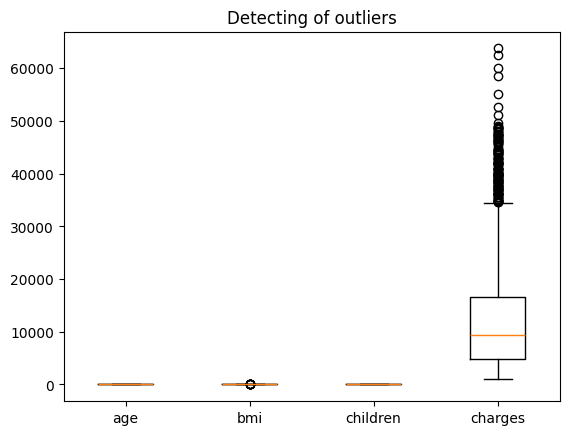

In [12]:
# lets first identify and drop outliers.
plt.boxplot([df['age'],df['bmi'],df['children'],df['charges']],tick_labels=['age','bmi','children','charges'])
plt.title('Detecting of outliers')
plt.show()

In [13]:
Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)
Q1,Q3

(np.float64(26.29), np.float64(34.7))

In [14]:
q1=df.charges.quantile(0.25)
q3=df.charges.quantile(0.75)
q1,q3

(np.float64(4746.344), np.float64(16657.71745))

In [15]:
df_no_outliers= df[(df['charges']<16657) &  (df['bmi']<34)]

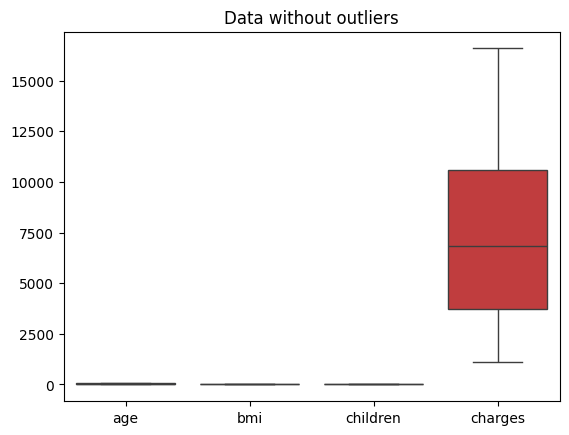

In [16]:
# deleting the outliers using inter quantile range.
sns.boxplot(df_no_outliers[['age','bmi','children','charges']])
plt.title('Data without outliers')
plt.show()

#### lets do some plots to gain some usefull insigts.

**1.Univariate Analysis**


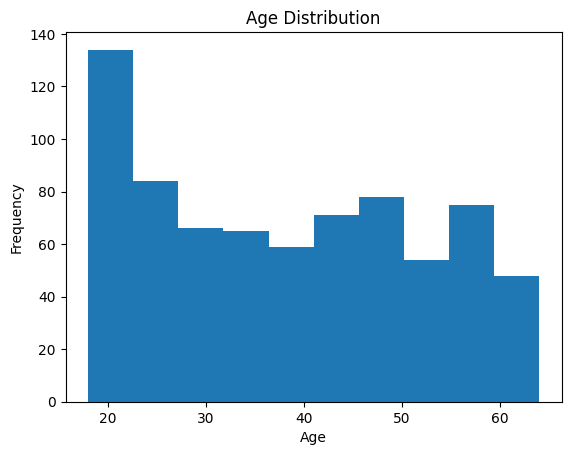

In [17]:
# Age distribution using histogram.
plt.hist(df_no_outliers.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

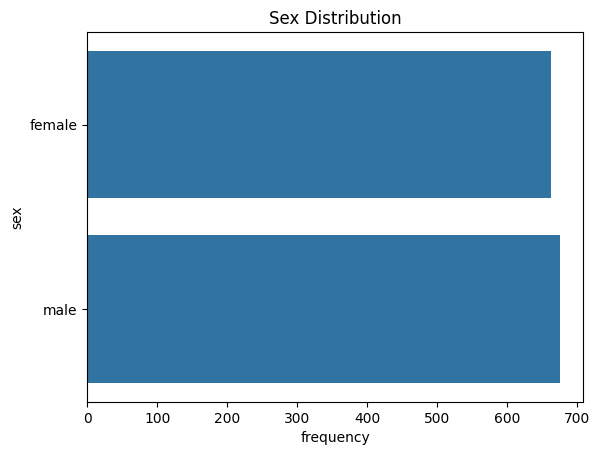

In [18]:
# Sex(male,female) distribution.
sns.countplot(df.sex)
plt.title('Sex Distribution')
plt.xlabel('frequency')
plt.show()

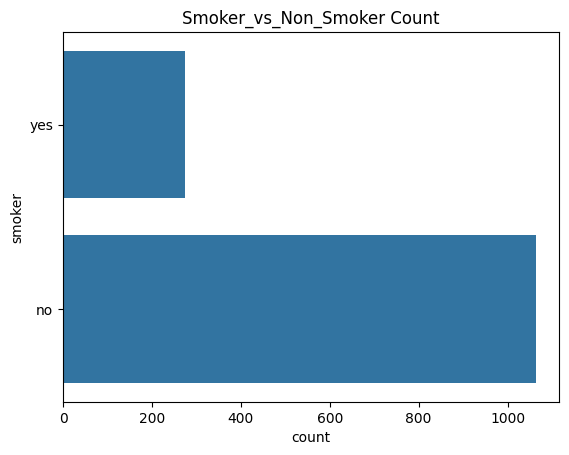

In [19]:
# smoker_vs_nonSmoker count using countplos
sns.countplot(df.smoker)
plt.title('Smoker_vs_Non_Smoker Count')
plt.show()

- it seems that most of the people are non_smokers.
- only few are smokers.

**2.Bivariate Analysis**

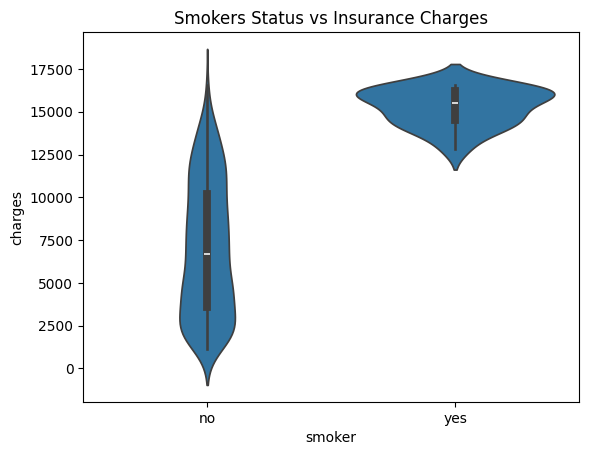

In [20]:
# smoke vs charge distribution
sns.violinplot(x='smoker',y='charges',data=df_no_outliers)
plt.title('Smokers Status vs Insurance Charges')
plt.show()

- smokers : smokers(yes) have higher insurance charges as we expected. because of smoking is hazardous.
- Non_smokers : Non_smokers(no) have majority of charges are generally low. but broader range.

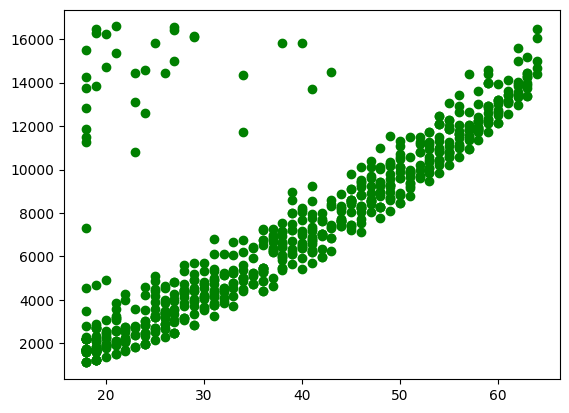

In [21]:
# age vs charge distribution
plt.scatter(x='age',y='charges',data=df_no_outliers,c='g')


- As Number Age increases the Insurance charges also increasing.Its obvious age is direct proportional to charges.
- Very least had high charge of insurance cost even in 20's . it means they might took costly(premium) plans.

Text(0.5, 1.0, 'Region wise Age Distribution')

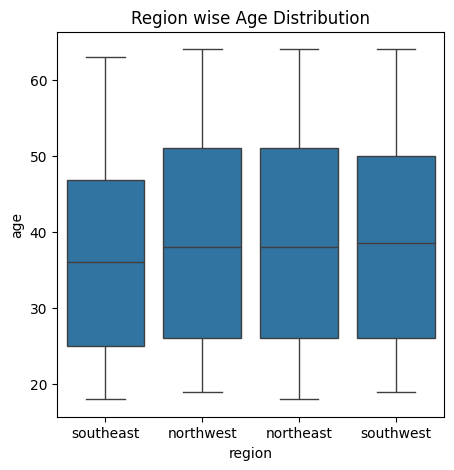

In [22]:
#age vs region 
plt.figure(figsize=(5,5))
sns.boxplot(x='region',y='age',data=df_no_outliers)
plt.title('Region wise Age Distribution')

Text(0.5, 1.0, 'Region wise Insurance charges')

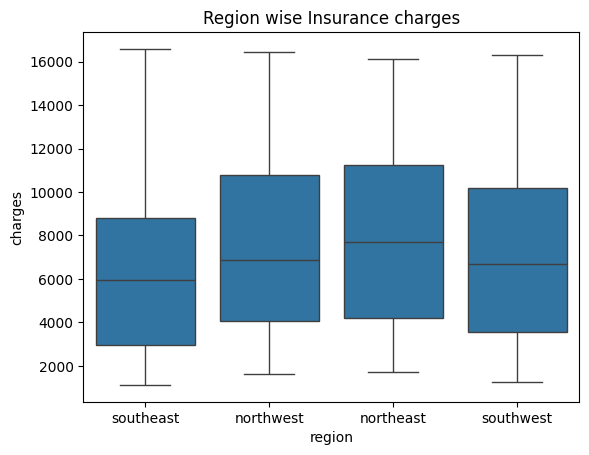

In [23]:
# region vs charge
sns.boxplot(x='region',y='charges',data=df_no_outliers)
plt.title('Region wise Insurance charges')


- According to the data :
    - SouthEast -> region is charging the lowest average insurance cost.(6000)
    - NorthEast -> region is charging the Highest average insurance cost.approx(8000)

In [24]:
df_no_outliers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


**Feature Encoding**

In [33]:
df_encoded=pd.get_dummies(df_no_outliers,columns=['region'],prefix='region',dtype=int,drop_first=True)

In [34]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
1,18,male,33.77,1,no,1725.5523,0,1,0
2,28,male,33.00,3,no,4449.4620,0,1,0
4,32,male,28.88,0,no,3866.8552,1,0,0
5,31,female,25.74,0,no,3756.6216,0,1,0
6,46,female,33.44,1,no,8240.5896,0,1,0


In [36]:
# label encoding the smoker feature.
label_encoder = LabelEncoder()
df_encoded['Smoker_encoded']=label_encoder.fit_transform(df_encoded.smoker)

In [38]:
df_encoded['Sex_encoded']=label_encoder.fit_transform(df_encoded.sex)

In [39]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,Smoker_encoded,Sex_encoded
1,18,male,33.77,1,no,1725.5523,0,1,0,0,1
2,28,male,33.00,3,no,4449.4620,0,1,0,0,1
4,32,male,28.88,0,no,3866.8552,1,0,0,0,1
5,31,female,25.74,0,no,3756.6216,0,1,0,0,0
6,46,female,33.44,1,no,8240.5896,0,1,0,0,0


In [45]:
df_clean=df_encoded[['age','bmi','children','Sex_encoded','Smoker_encoded','region_northwest','region_southeast','region_southwest','charges']].copy()
df_clean

,age,bmi,children,Sex_encoded,Smoker_encoded,region_northwest,region_southeast,region_southwest,charges
1,18,33.77,1,1,0,0,1,0,1725.55230
2,28,33.00,3,1,0,0,1,0,4449.46200
4,32,28.88,0,1,0,1,0,0,3866.85520
5,31,25.74,0,0,0,0,1,0,3756.62160
6,46,33.44,1,0,0,0,1,0,8240.58960
...,...,...,...,...,...,...,...,...,...
1330,57,25.74,2,0,0,0,1,0,12629.16560
1331,23,33.40,0,0,0,0,0,1,10795.93733
1333,50,30.97,3,1,0,1,0,0,10600.54830
1334,18,31.92,0,0,0,0,0,0,2205.98080


####  ==> There is no strong correlation among the feature,means every feature had unique advantage to the model to perform more generalized.so i am taking every feature.

In [49]:
# data separation.
X=df_clean[['age','bmi','children','Sex_encoded','Smoker_encoded','region_northwest','region_southeast','region_southwest']].copy()
X.head(2)

,age,bmi,children,Sex_encoded,Smoker_encoded,region_northwest,region_southeast,region_southwest
1,18,33.77,1,1,0,0,1,0
2,28,33.00,3,1,0,0,1,0


In [58]:
Y=df_clean[['charges']].copy()
y=np.ravel(Y)

### Modeling

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Here i am using Random forest algorithm.
- Because : 
  - Random Forest reduces overfitting.
  - Gives better accuracy and a robust algorithm.
  - Best algorithm for regression problems, especially with noisy data.

In [60]:
# Random forest.
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model=rf.fit(X_train,y_train)

In [64]:
y_pred=model.predict(X_test)
y_pred[:10]

array([ 3393.349405 , 15671.9651535,  5674.376221 , 12734.3524365,
        9474.03924  ,  8388.032157 , 12362.982117 ,  7113.2852795,
       11281.7564175,  3458.193136 ])

In [74]:

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('Mean_Absolute_error :',mae)
print('Mean_Squared_error :',mse)
print('Root_Mean_square_error :',rmse)
print('R_squared :',r2)

Mean_Absolute_error : 600.945263357602
Mean_Squared_error : 2201561.4460144453
Root_Mean_square_error : 1483.7659673999958
R_squared : 0.8661678978140575


### Visualizing the Model vs Actual Predictions.

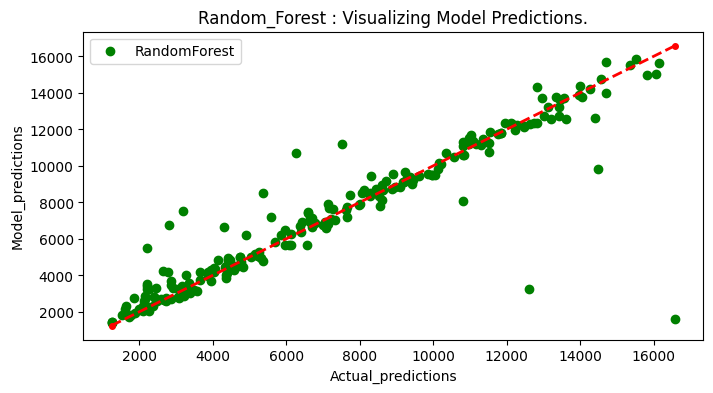

In [94]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred,c='g',label='RandomForest')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red', linestyle='dashed',linewidth=2,marker='.', markersize=8)
plt.title('Random_Forest : Visualizing Model Predictions.')
plt.xlabel('Actual_predictions')
plt.ylabel('Model_predictions')
plt.legend()

#### inferencing on sample data
     layout ['age','bmi','children','Sex_encoded','Smoker_encoded','region_northwest','region_southeast','region_southwest']

In [117]:
input_data = pd.DataFrame([{
    'age': 25,
    'bmi': 35.6,
    'children': 4,
    'Sex_encoded': 0,
    'Smoker_encoded': 1,
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0
}])

prediction = model.predict(input_data)
print(prediction)


[16253.893434]
